# Generate loft from a parameter config file

Load configs

In [27]:
from cfdmod.use_cases.loft.parameters import LoftParams
import pathlib

cfg_file = pathlib.Path("./fixtures/tests/loft/loft_params.yaml")
cfg = LoftParams.from_file(cfg_file)

cfg

LoftParams(loft_length=1200.0, mesh_element_size=25.0, wind_source_direction=(-1.0, 0.0, 0.0), upwind_elevation=780.0)

Load surface mesh

In [28]:
from cfdmod.api.geometry.STL import read_stl

mesh_path = pathlib.Path("./fixtures/tests/loft/terrain.stl")

triangles, normals = read_stl(mesh_path)

triangles, normals

(array([[[ 622.19226  ,    7.6139417,  774.35693  ],
         [ 620.78424  ,    7.970398 ,  773.9987   ],
         [ 614.316    ,    4.6423063,  773.50385  ]],
 
        [[ 645.47797  ,  -15.484023 ,  767.435    ],
         [ 643.78357  ,  -16.447126 ,  766.5187   ],
         [ 645.73376  ,  -16.655039 ,  766.02747  ]],
 
        [[ 642.06805  ,  -12.476355 ,  767.9776   ],
         [ 632.3187   ,   -4.6019497,  770.26587  ],
         [ 642.0133   ,  -14.797253 ,  767.05884  ]],
 
        ...,
 
        [[ 605.6187   , -651.87646  ,  757.34576  ],
         [ 615.6246   , -675.4446   ,  757.1043   ],
         [ 627.32086  , -659.3153   ,  760.9082   ]],
 
        [[ 605.6187   , -651.87646  ,  757.34576  ],
         [ 591.1564   , -671.6936   ,  755.1523   ],
         [ 615.6246   , -675.4446   ,  757.1043   ]],
 
        [[ 610.7315   ,    9.4921   ,  780.0834   ],
         [ 620.91907  ,    9.256538 ,  790.40234  ],
         [ 585.0646   ,    9.5950575,  791.08875  ]]], dtype=float32)

Find border points

In [29]:
from cfdmod.use_cases.loft.functions import find_border, project_border
import numpy as np

border_verts, border_edges = find_border(triangle_vertices=triangles)
border_profile = project_border(border_verts, projection_diretion=np.array([1,1,0]))


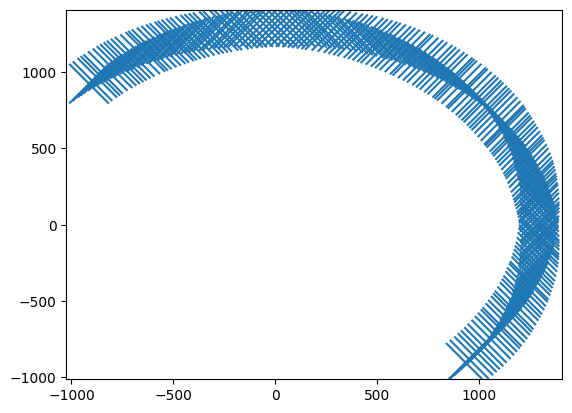

In [30]:
import matplotlib.pyplot as plt

# plt.scatter(border_verts[:, 0], border_verts[:, 1], border_verts[:, 2], marker="x")
plt.scatter(border_profile[:, 0], border_profile[:, 1], border_profile[:, 2], marker="x")
plt.show()
plt.close()